## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading 1st - Datasets from Ball_csv files

In [2]:
delivery_data = pd.read_csv('Data Set/IPL_Ball_by_Ball_2008_2022.csv')
delivery_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [3]:
delivery_data.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [4]:
delivery_data.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

# Data Prepairation

In [5]:
delivery_data.extra_type.unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [6]:
# add new cloumns on deliver_data according to the extra_type details
delivery_data = pd.get_dummies(delivery_data , columns= ['extra_type'])

In [7]:
delivery_data.rename(columns={'extra_type_byes': "byes" , 'extra_type_legbyes': 'legbyes', 'extra_type_noballs': 'noballs', 'extra_type_penalty':'penalty','extra_type_wides':'wides'}, inplace = True )

In [8]:
delivery_data.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'byes', 'legbyes', 'noballs', 'penalty', 'wides'],
      dtype='object')

In [9]:
# Team details with a  standrad name (same Teams with different type of name)
delivery_data.BattingTeam  = delivery_data.BattingTeam.replace (to_replace="Rising Pune Supergiants", value= 'Pune Warriors')
delivery_data.BattingTeam  = delivery_data.BattingTeam.replace (to_replace="Punjab Kings", value= 'Kings XI Punjab')
delivery_data.BattingTeam  = delivery_data.BattingTeam.replace (to_replace="Rising Pune Supergiant", value= 'Pune Warriors')
delivery_data.BattingTeam  = delivery_data.BattingTeam.replace (to_replace="Deccan Chargers", value= 'Sunrisers Hyderabad')
delivery_data.BattingTeam  = delivery_data.BattingTeam.replace (to_replace="Delhi Capitals", value= 'Delhi Daredevils')
delivery_data.BattingTeam  = delivery_data.BattingTeam.replace (to_replace="Gujarat Lions", value= 'Gujarat Titans')
delivery_data.BattingTeam .unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Kings XI Punjab', 'Delhi Daredevils',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Pune Warriors', 'Kochi Tuskers Kerala'], dtype=object)

In [10]:
df_delivery= delivery_data.sort_values(by=['ID'])

In [11]:
df_delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,batsman_run,extras_run,total_run,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,byes,legbyes,noballs,penalty,wides
225953,335982,2,15,2,SB Joshi,LR Shukla,P Kumar,0,0,0,...,1,SB Joshi,caught,BB McCullum,Royal Challengers Bangalore,0,0,0,0,0
225809,335982,1,12,7,BB McCullum,JH Kallis,DJ Hussey,1,0,1,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,0
225808,335982,1,12,6,BB McCullum,JH Kallis,DJ Hussey,4,0,4,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,0
225807,335982,1,12,5,BB McCullum,JH Kallis,DJ Hussey,0,1,1,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,1
225806,335982,1,12,4,BB McCullum,JH Kallis,DJ Hussey,2,0,2,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,0


## Reading 2nd - Datasets from Match_csv files

In [12]:
match_data = pd.read_csv('Data Set/IPL_Matches_2008_2022.csv')

In [13]:
match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [14]:
match_data.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [15]:
match_data.Season.unique()

array(['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08'],
      dtype=object)

# Data Prepairation

In [16]:

match_data.Season = match_data.Season.replace(to_replace='2020/21' , value='2021')
match_data.Season = match_data.Season.replace(to_replace='2009/10' , value='2010')
match_data.Season = match_data.Season.replace(to_replace='2007/08' , value='2008')

In [17]:
match_data.Season.unique()

array(['2022', '2021', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008'], dtype=object)

In [18]:
match_data.City.unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack',
       'Dharamsala', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley',
       'East London', 'Cape Town'], dtype=object)

In [19]:
#replace the null rows of the city as per the venue details 
match_data.City.fillna(match_data.Venue , inplace= True)

In [20]:
match_data.City = match_data.City.replace(to_replace='Dubai International Cricket Stadium' , value='Dubai')
match_data.City = match_data.City.replace(to_replace='Sharjah Cricket Stadium' , value='Sharjah')
match_data.City = match_data.City.replace(to_replace='Navi Mumbai' , value='Mumbai')
match_data.City = match_data.City.replace(to_replace='Bangalore' , value='Bengaluru')

In [21]:
match_data.City.unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Pune', 'Dubai', 'Sharjah',
       'Abu Dhabi', 'Delhi', 'Chennai', 'Hyderabad', 'Visakhapatnam',
       'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore', 'Kanpur', 'Rajkot',
       'Raipur', 'Ranchi', 'Cuttack', 'Dharamsala', 'Kochi', 'Nagpur',
       'Johannesburg', 'Centurion', 'Durban', 'Bloemfontein',
       'Port Elizabeth', 'Kimberley', 'East London', 'Cape Town'],
      dtype=object)

In [22]:
# rename the venue details with a  standrad name (same venues with different type of name)
match_data.Venue.unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'MA Chidambaram Stadium',
       'Punjab Cricket Association IS Bindra Stadium', 'Wankhede Stadium',
       'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Punjab Cricket A

In [23]:
match_data.Venue = match_data.Venue.replace (to_replace="Narendra Modi Stadium, Ahmedabad", value= 'N.Modi Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Eden Gardens, Kolkata", value= 'Eden Gardens')
match_data.Venue = match_data.Venue.replace (to_replace="Wankhede Stadium, Mumbai", value= 'Wankhede Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Dr DY Patil Sports Academy, Mumbai", value= 'Patil Sports Academy')
match_data.Venue = match_data.Venue.replace (to_replace="Maharashtra Cricket Association Stadium, Pune", value= 'MCA Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Dubai International Cricket Stadium", value= 'Dubai Int.Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Zayed Cricket Stadium, Abu Dhabi", value= 'Zayed Cricket Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Arun Jaitley Stadium, Delhi", value= 'Arun Jaitley Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="MA Chidambaram Stadium, Chepauk, Chennai", value= 'MA Chidambaram Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Rajiv Gandhi International Stadium", value= 'RG.Int. Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium", value= 'Dr.YSRR Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Punjab Cricket Association IS Bindra Stadium", value= 'PCA Bindra Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Maharashtra Cricket Association Stadium", value= 'MCA Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Rajiv Gandhi International Stadium, Uppal", value= 'RG.Int. Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Punjab Cricket Association Stadium, Mohali", value= 'PCA Bindra Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Brabourne Stadium, Mumbai", value= 'Brabourne Stadium')

In [24]:
match_data.Venue = match_data.Venue.replace (to_replace="Shaheed Veer Narayan Singh International Stadium", value= 'SVNS Int. Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Saurashtra Cricket Association Stadium", value= 'SCA Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="MA Chidambaram Stadium, Chepauk", value= 'MA Chidambaram Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="JSCA International Stadium Complex", value= 'JSCA Int. Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Sardar Patel Stadium, Motera", value= 'Sardar Patel Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Subrata Roy Sahara Stadium", value= 'SRS Stadium')
match_data.Venue = match_data.Venue.replace (to_replace='Himachal Pradesh Cricket Association Stadium', value= 'HPCA Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Dr DY Patil Sports Academy", value= 'Patil Sports Academy')
match_data.Venue = match_data.Venue.replace (to_replace="Vidarbha Cricket Association Stadium, Jamtha", value= 'VCA Stadium')
match_data.Venue = match_data.Venue.replace (to_replace="Punjab Cricket Association IS Bindra Stadium, Mohali", value= 'PCA Bindra Stadium')
match_data.Venue.unique()

array(['N.Modi Stadium', 'Eden Gardens', 'Wankhede Stadium',
       'Brabourne Stadium', 'Patil Sports Academy', 'MCA Stadium',
       'Dubai Int.Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium', 'Arun Jaitley Stadium',
       'MA Chidambaram Stadium', 'Sheikh Zayed Stadium',
       'RG.Int. Stadium', 'Dr.YSRR Stadium', 'PCA Bindra Stadium',
       'M.Chinnaswamy Stadium', 'Sawai Mansingh Stadium',
       'Holkar Cricket Stadium', 'M Chinnaswamy Stadium',
       'Feroz Shah Kotla', 'Green Park', 'SCA Stadium',
       'SVNS Int. Stadium', 'JSCA Int. Stadium', 'Sardar Patel Stadium',
       'Barabati Stadium', 'SRS Stadium', 'HPCA Stadium', 'Nehru Stadium',
       'VCA Stadium', 'New Wanderers Stadium', 'SuperSport Park',
       'Kingsmead', 'OUTsurance Oval', "St George's Park",
       'De Beers Diamond Oval', 'Buffalo Park', 'Newlands'], dtype=object)

In [25]:
match_data.Team1 = match_data.Team1.replace (to_replace="Rising Pune Supergiants", value= 'Pune Warriors')
match_data.Team1 = match_data.Team1.replace (to_replace="Punjab Kings", value= 'Kings XI Punjab')
match_data.Team1 = match_data.Team1.replace (to_replace="Rising Pune Supergiant", value= 'Pune Warriors')
match_data.Team1 = match_data.Team1.replace (to_replace="Deccan Chargers", value= 'Sunrisers Hyderabad')
match_data.Team1 = match_data.Team1.replace (to_replace="Delhi Capitals", value= 'Delhi Daredevils')
match_data.Team1 = match_data.Team1.replace (to_replace="Gujarat Lions", value= 'Gujarat Titans')
match_data.Team1.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Daredevils', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Mumbai Indians', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

In [26]:
match_data.Team2 = match_data.Team2.replace (to_replace="Rising Pune Supergiants", value= 'Pune Warriors')
match_data.Team2 = match_data.Team2.replace (to_replace="Punjab Kings", value= 'Kings XI Punjab')
match_data.Team2 = match_data.Team2.replace (to_replace="Rising Pune Supergiant", value= 'Pune Warriors')
match_data.Team2 = match_data.Team2.replace (to_replace="Deccan Chargers", value= 'Sunrisers Hyderabad')
match_data.Team2 = match_data.Team2.replace (to_replace="Delhi Capitals", value= 'Delhi Daredevils')
match_data.Team2 = match_data.Team2.replace (to_replace="Gujarat Lions", value= 'Gujarat Titans')
match_data.Team1.unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Daredevils', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Mumbai Indians', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

In [27]:
match_data.TossWinner = match_data.TossWinner.replace (to_replace="Rising Pune Supergiants", value= 'Pune Warriors')
match_data.TossWinner= match_data.TossWinner.replace (to_replace="Punjab Kings", value= 'Kings XI Punjab')
match_data.TossWinner = match_data.TossWinner.replace (to_replace="Rising Pune Supergiant", value= 'Pune Warriors')
match_data.TossWinner = match_data.TossWinner.replace (to_replace="Deccan Chargers", value= 'Sunrisers Hyderabad')
match_data.TossWinner = match_data.TossWinner.replace (to_replace="Delhi Capitals", value= 'Delhi Daredevils')
match_data.TossWinner = match_data.TossWinner.replace (to_replace="Gujarat Lions", value= 'Gujarat Titans')
match_data.TossWinner.unique()

array(['Rajasthan Royals', 'Lucknow Super Giants', 'Gujarat Titans',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Chennai Super Kings',
       'Kings XI Punjab', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

In [28]:
match_data.WinningTeam = match_data.WinningTeam.replace (to_replace="Rising Pune Supergiants", value= 'Pune Warriors')
match_data.WinningTeamr= match_data.WinningTeam.replace (to_replace="Punjab Kings", value= 'Kings XI Punjab')
match_data.WinningTeam = match_data.WinningTeam.replace (to_replace="Rising Pune Supergiant", value= 'Pune Warriors')
match_data.WinningTeam = match_data.WinningTeam.replace (to_replace="Deccan Chargers", value= 'Sunrisers Hyderabad')
match_data.WinningTeam = match_data.WinningTeam.replace (to_replace="Delhi Capitals", value= 'Delhi Daredevils')
match_data.WinningTeam = match_data.WinningTeam.replace (to_replace="Gujarat Lions", value= 'Gujarat Titans')
match_data.WinningTeam.unique()

C:\Users\MY PC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Daredevils',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       nan, 'Pune Warriors', 'Kochi Tuskers Kerala'], dtype=object)

In [29]:
df_match= match_data.sort_values(by=['ID'])

In [30]:
df_match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
949,335982,Bengaluru,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen
948,335983,Chandigarh,2008-04-19,2008,2,Kings XI Punjab,Chennai Super Kings,PCA Bindra Stadium,Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri
947,335984,Delhi,2008-04-19,2008,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
946,335985,Mumbai,2008-04-20,2008,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
945,335986,Kolkata,2008-04-20,2008,4,Kolkata Knight Riders,Sunrisers Hyderabad,Eden Gardens,Sunrisers Hyderabad,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan


# Merge the two data frame and create a single data frame

In [31]:
df_merge = df_match.merge(df_delivery, on= ['ID'])
df_merge.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,byes,legbyes,noballs,penalty,wides
0,335982,Bengaluru,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,1,SB Joshi,caught,BB McCullum,Royal Challengers Bangalore,0,0,0,0,0
1,335982,Bengaluru,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,0
2,335982,Bengaluru,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,0
3,335982,Bengaluru,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,1
4,335982,Bengaluru,2008-04-18,2008,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,0


In [32]:
df_merge.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides'],
      dtype='object')

In [33]:
# add new column of ball_data set fro partnership analysis
df_merge['1st_batter'] = df_merge.apply(lambda x: x['batter'] if x['batter'] < x['non-striker'] else x['non-striker'], axis=1)
df_merge['2nd_batter'] = df_merge.apply(lambda x: x['non-striker'] if x['batter'] < x['non-striker'] else x['batter'] , axis=1)


In [34]:
df_merge['BowlingTeam'] = df_merge.apply(lambda x: x['Team2'] if x['BattingTeam'] == x['Team1'] else x['Team1'], axis=1)

In [35]:
df_merge.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides', '1st_batter', '2nd_batter', 'BowlingTeam'],
      dtype='object')

## Exploratory Data Analysis

# Most IPL Matches played in which season ?

In [36]:
df_merge.Season.unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2021', '2022'], dtype=object)

In [37]:
season_data = df_merge.groupby(['ID','Season']).count().index.droplevel(level=0).value_counts().sort_index()
season_data

2008     58
2009     57
2010     60
2011     73
2012     74
2013     76
2014     60
2015     59
2016     60
2017     59
2018     60
2019     60
2021    120
2022     74
Name: Season, dtype: int64

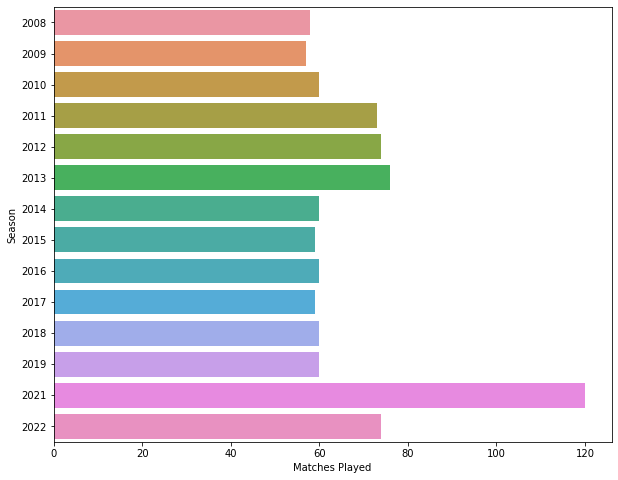

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(y=season_data.index,x=season_data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

# Most IPL Matches played in which venue ?

In [39]:
venue_data =  df_merge.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()
venue_data

Wankhede Stadium           104
Eden Gardens                79
MA Chidambaram Stadium      67
M Chinnaswamy Stadium       65
RG.Int. Stadium             64
Feroz Shah Kotla            60
PCA Bindra Stadium          56
Sawai Mansingh Stadium      47
Dubai Int.Stadium           46
Patil Sports Academy        37
MCA Stadium                 35
Sheikh Zayed Stadium        29
Sharjah Cricket Stadium     28
Brabourne Stadium           27
Arun Jaitley Stadium        18
SRS Stadium                 16
M.Chinnaswamy Stadium       15
Kingsmead                   15
Dr.YSRR Stadium             13
Sardar Patel Stadium        12
SuperSport Park             12
SCA Stadium                 10
Holkar Cricket Stadium       9
HPCA Stadium                 9
New Wanderers Stadium        8
Zayed Cricket Stadium        8
St George's Park             7
JSCA Int. Stadium            7
N.Modi Stadium               7
Barabati Stadium             7
Newlands                     7
SVNS Int. Stadium            6
Nehru St

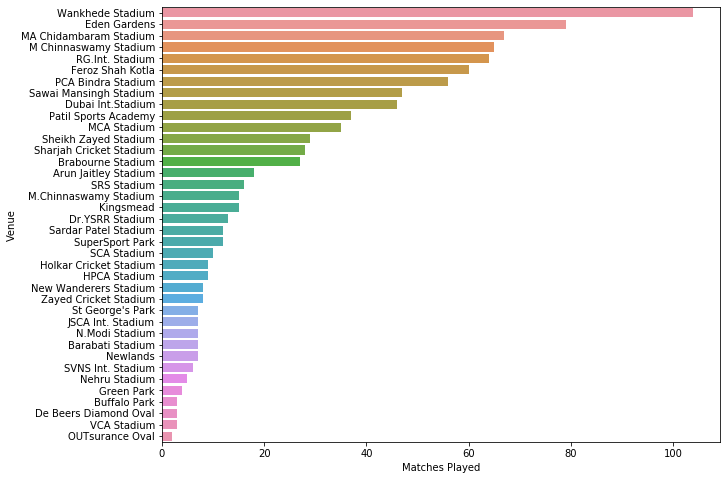

In [40]:
plt.figure(figsize=(10,8))
sns.barplot(y=venue_data.index,x=venue_data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Venue')
plt.show()

# Most IPL Matches played by which team?

In [41]:
team_data1 = df_merge.groupby(['BattingTeam','ID']).count().index.droplevel(level=1).value_counts()
team_data1

Mumbai Indians                 231
Sunrisers Hyderabad            227
Royal Challengers Bangalore    226
Delhi Daredevils               224
Kolkata Knight Riders          223
Kings XI Punjab                218
Chennai Super Kings            208
Rajasthan Royals               191
Pune Warriors                   75
Gujarat Titans                  46
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Name: BattingTeam, dtype: int64

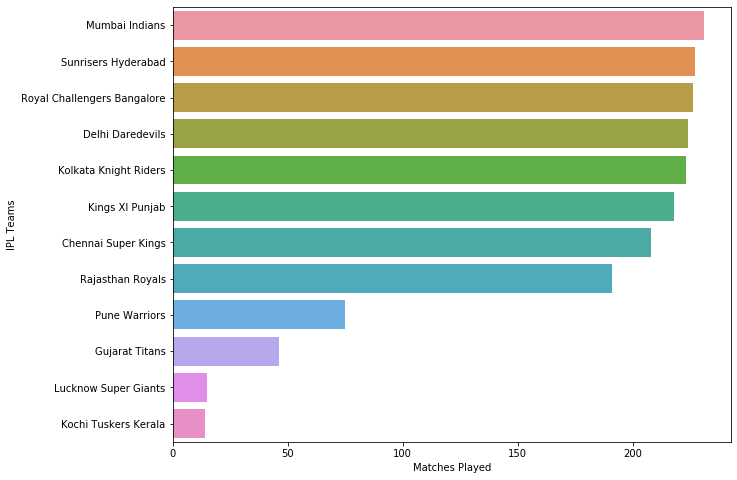

In [42]:
plt.figure(figsize=(10,8))
sns.barplot(y=team_data1.index,x=team_data1,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('IPL Teams')
plt.show()

# Most IPL Matches played woned by which team?

In [43]:
wining_team = df_merge.groupby(['WinningTeam','ID']).count().index.droplevel(level=1).value_counts()
print('Top ten IPL teams')
wining_team

Top ten IPL teams


Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Sunrisers Hyderabad            104
Delhi Daredevils               103
Rajasthan Royals                96
Kings XI Punjab                 88
Pune Warriors                   27
Gujarat Titans                  25
Punjab Kings                    13
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: WinningTeam, dtype: int64

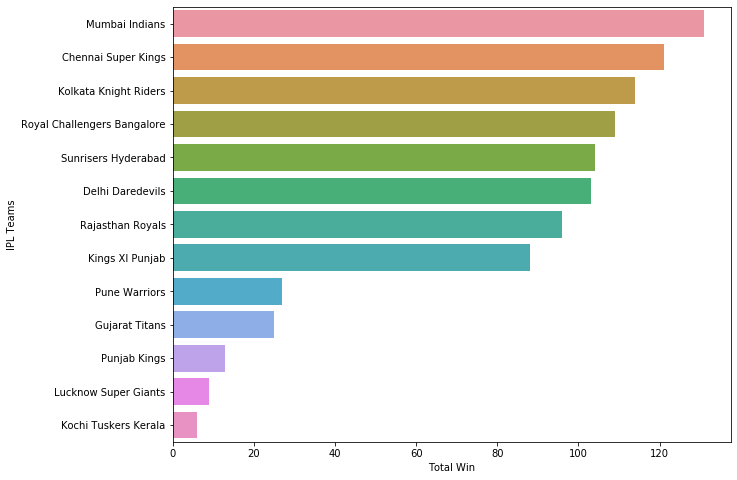

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(y=wining_team.index,x=wining_team,orient='h')
plt.xlabel('Total Win')
plt.ylabel('IPL Teams')
plt.show()

In [45]:
#Top ten man of the match?
ManOfDMatch= df_merge.groupby(['Player_of_Match','ID']).count().index.droplevel(level=1).value_counts()
ManOfDMatch.head(10)

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
YK Pathan         16
SR Watson         16
KA Pollard        14
SK Raina          14
V Kohli           14
Name: Player_of_Match, dtype: int64

In [46]:
df_merge.groupby(['TossWinner','ID']).count().index.droplevel(level=1).value_counts()

Mumbai Indians                 123
Sunrisers Hyderabad            117
Delhi Daredevils               116
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Kings XI Punjab                 94
Pune Warriors                   33
Gujarat Titans                  25
Kochi Tuskers Kerala             8
Lucknow Super Giants             7
Name: TossWinner, dtype: int64

# Home Ground Winning Matches Percentage For Teams

In [47]:
# Mumbai Indians
df_MI=df_merge[df_merge['WinningTeam']=='Mumbai Indians']
df_MI.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()

Wankhede Stadium           44
Eden Gardens               10
M Chinnaswamy Stadium       8
Brabourne Stadium           7
RG.Int. Stadium             7
MA Chidambaram Stadium      7
Sheikh Zayed Stadium        6
Patil Sports Academy        6
PCA Bindra Stadium          4
Feroz Shah Kotla            3
Dubai Int.Stadium           3
Sharjah Cricket Stadium     3
Arun Jaitley Stadium        3
Zayed Cricket Stadium       2
St George's Park            2
Dr.YSRR Stadium             2
Holkar Cricket Stadium      2
SRS Stadium                 2
MCA Stadium                 2
Sawai Mansingh Stadium      2
Newlands                    1
SCA Stadium                 1
Sardar Patel Stadium        1
Buffalo Park                1
M.Chinnaswamy Stadium       1
SuperSport Park             1
Name: Venue, dtype: int64

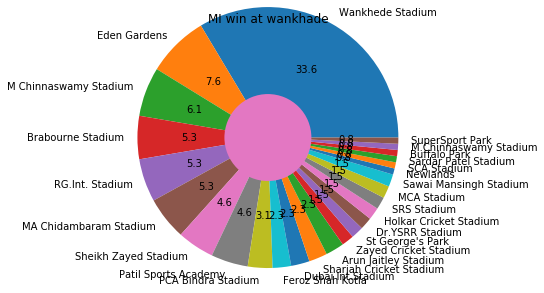

In [48]:
plt.pie(list(df_MI.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()),labels=list(df_MI.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('MI win at wankhade')
plt.show()

In [49]:
# Chennai Super Kings 
df_CSK=df_merge[df_merge['WinningTeam']=='Chennai Super Kings']
df_CSK.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()

MA Chidambaram Stadium     40
Wankhede Stadium           11
Dubai Int.Stadium           9
Patil Sports Academy        6
MCA Stadium                 6
Feroz Shah Kotla            5
Eden Gardens                5
M Chinnaswamy Stadium       4
RG.Int. Stadium             3
PCA Bindra Stadium          3
Sharjah Cricket Stadium     3
Sheikh Zayed Stadium        3
JSCA Int. Stadium           3
Sawai Mansingh Stadium      3
Dr.YSRR Stadium             2
St George's Park            2
Arun Jaitley Stadium        2
SuperSport Park             2
HPCA Stadium                1
Buffalo Park                1
M.Chinnaswamy Stadium       1
Zayed Cricket Stadium       1
De Beers Diamond Oval       1
Brabourne Stadium           1
New Wanderers Stadium       1
Kingsmead                   1
SRS Stadium                 1
Name: Venue, dtype: int64

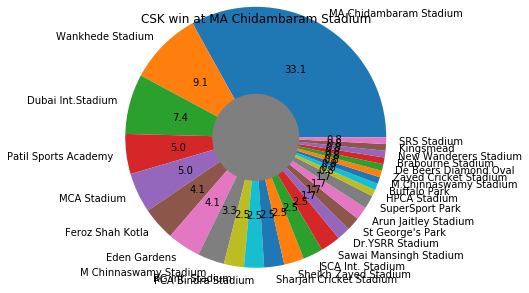

In [50]:
plt.pie(list(df_CSK.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()),labels=list(df_CSK.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('CSK win at MA Chidambaram Stadium')
plt.show()

In [51]:
# Kolkata Knight Riders  
df_KKR=df_merge[df_merge['WinningTeam']=='Kolkata Knight Riders']
df_KKR.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()

Eden Gardens               45
M Chinnaswamy Stadium       6
Sheikh Zayed Stadium        6
Sharjah Cricket Stadium     5
RG.Int. Stadium             5
MCA Stadium                 5
Feroz Shah Kotla            5
Wankhede Stadium            4
PCA Bindra Stadium          4
Barabati Stadium            3
MA Chidambaram Stadium      3
Dubai Int.Stadium           3
Sawai Mansingh Stadium      3
Patil Sports Academy        3
SRS Stadium                 3
Kingsmead                   2
Zayed Cricket Stadium       2
M.Chinnaswamy Stadium       2
SuperSport Park             1
N.Modi Stadium              1
Holkar Cricket Stadium      1
SCA Stadium                 1
JSCA Int. Stadium           1
Name: Venue, dtype: int64

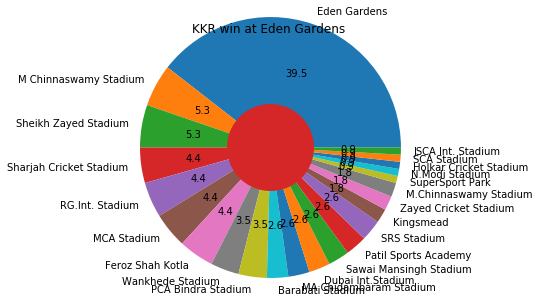

In [52]:
plt.pie(list(df_KKR.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()),labels=list(df_KKR.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('KKR win at Eden Gardens ')
plt.show()

In [53]:
# Royal Challengers Bangalore
df_RCB=df_merge[df_merge['WinningTeam']=='Royal Challengers Bangalore']
df_RCB.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()

M Chinnaswamy Stadium      29
Dubai Int.Stadium           8
M.Chinnaswamy Stadium       8
Wankhede Stadium            8
Feroz Shah Kotla            5
MA Chidambaram Stadium      5
Eden Gardens                5
MCA Stadium                 4
PCA Bindra Stadium          4
Sharjah Cricket Stadium     3
Kingsmead                   3
New Wanderers Stadium       3
Sawai Mansingh Stadium      3
Patil Sports Academy        3
Sheikh Zayed Stadium        2
SRS Stadium                 2
RG.Int. Stadium             2
SuperSport Park             2
SVNS Int. Stadium           1
SCA Stadium                 1
JSCA Int. Stadium           1
Holkar Cricket Stadium      1
Arun Jaitley Stadium        1
Brabourne Stadium           1
Sardar Patel Stadium        1
Nehru Stadium               1
N.Modi Stadium              1
Newlands                    1
Name: Venue, dtype: int64

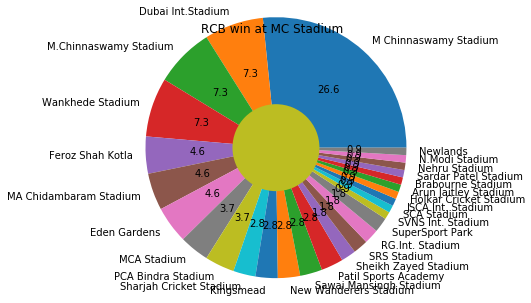

In [54]:
plt.pie(list(df_RCB.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()),labels=list(df_RCB.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('RCB win at MC Stadium  ')
plt.show()

In [55]:
# Sunrisers Hyderabad 
df_SRH=df_merge[df_merge['WinningTeam']=='Sunrisers Hyderabad']
df_SRH.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()

RG.Int. Stadium            33
Dubai Int.Stadium           7
Feroz Shah Kotla            6
Patil Sports Academy        5
PCA Bindra Stadium          4
Barabati Stadium            3
MA Chidambaram Stadium      3
Brabourne Stadium           3
Wankhede Stadium            3
Dr.YSRR Stadium             3
M Chinnaswamy Stadium       3
Eden Gardens                2
Sheikh Zayed Stadium        2
Arun Jaitley Stadium        2
Sharjah Cricket Stadium     2
Newlands                    2
VCA Stadium                 2
HPCA Stadium                2
New Wanderers Stadium       2
Kingsmead                   2
SuperSport Park             2
SVNS Int. Stadium           1
Green Park                  1
SRS Stadium                 1
JSCA Int. Stadium           1
SCA Stadium                 1
De Beers Diamond Oval       1
Sawai Mansingh Stadium      1
Zayed Cricket Stadium       1
Sardar Patel Stadium        1
MCA Stadium                 1
Nehru Stadium               1
Name: Venue, dtype: int64

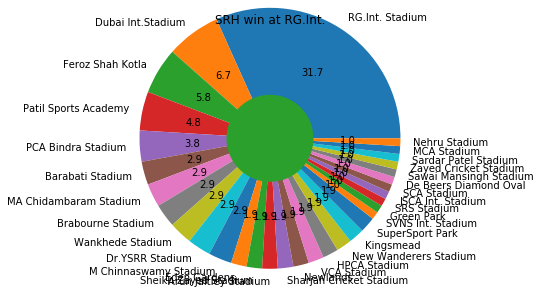

In [56]:
plt.pie(list(df_SRH.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()),labels=list(df_SRH.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('SRH win at RG.Int.')
plt.show()

In [57]:
# Delhi Daredevils
df_DD=df_merge[df_merge['WinningTeam']=='Delhi Daredevils']
df_DD.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()

Feroz Shah Kotla           23
Arun Jaitley Stadium        8
Dubai Int.Stadium           7
Wankhede Stadium            6
RG.Int. Stadium             5
Sharjah Cricket Stadium     5
SVNS Int. Stadium           4
MA Chidambaram Stadium      4
Brabourne Stadium           4
M Chinnaswamy Stadium       3
Patil Sports Academy        3
Kingsmead                   3
SuperSport Park             2
Eden Gardens                2
Dr.YSRR Stadium             2
Sawai Mansingh Stadium      2
MCA Stadium                 2
Sheikh Zayed Stadium        2
N.Modi Stadium              2
Newlands                    1
Nehru Stadium               1
Sardar Patel Stadium        1
OUTsurance Oval             1
M.Chinnaswamy Stadium       1
Buffalo Park                1
Green Park                  1
SRS Stadium                 1
Zayed Cricket Stadium       1
HPCA Stadium                1
SCA Stadium                 1
PCA Bindra Stadium          1
St George's Park            1
New Wanderers Stadium       1
Name: Venu

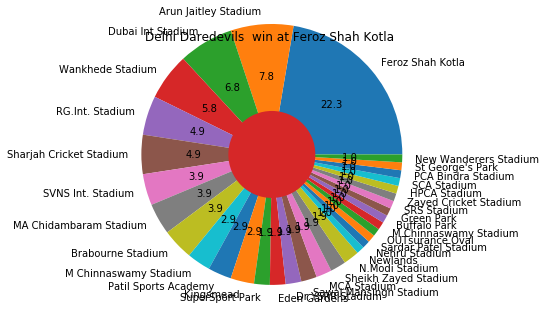

In [58]:
plt.pie(list(df_DD.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()),labels=list(df_DD.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('Delhi Daredevils  win at Feroz Shah Kotla ')
plt.show()

In [59]:
# Rajasthan Royals 
df_RR=df_merge[df_merge['WinningTeam']=='Rajasthan Royals']
df_RR.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()

Sawai Mansingh Stadium     32
Wankhede Stadium            9
Sardar Patel Stadium        7
Sheikh Zayed Stadium        6
Brabourne Stadium           5
Feroz Shah Kotla            4
MCA Stadium                 3
PCA Bindra Stadium          3
M Chinnaswamy Stadium       3
Eden Gardens                2
Sharjah Cricket Stadium     2
Dubai Int.Stadium           2
RG.Int. Stadium             2
Kingsmead                   2
SuperSport Park             2
Patil Sports Academy        2
SRS Stadium                 1
Zayed Cricket Stadium       1
St George's Park            1
Arun Jaitley Stadium        1
VCA Stadium                 1
MA Chidambaram Stadium      1
M.Chinnaswamy Stadium       1
Dr.YSRR Stadium             1
Newlands                    1
N.Modi Stadium              1
Name: Venue, dtype: int64

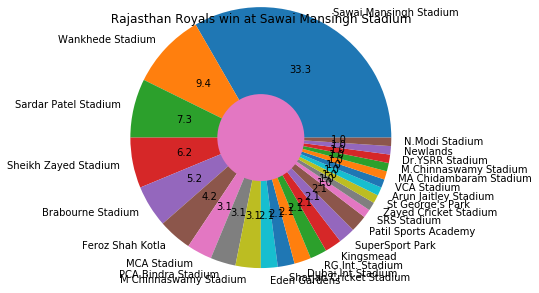

In [60]:
plt.pie(list(df_RR.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts()),labels=list(df_RR.groupby(['Venue','ID']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title(' Rajasthan Royals win at Sawai Mansingh Stadium ')
plt.show()

In [61]:
df_merge.TossDecision.unique()

array(['field', 'bat'], dtype=object)

In [62]:
df_MIDefend=df_merge[df_merge['WinningTeam']=='Mumbai Indians']
df_RR.groupby(['WonBy','ID']).count().index.droplevel(level=1).value_counts()

Wickets      57
Runs         37
SuperOver     2
Name: WonBy, dtype: int64

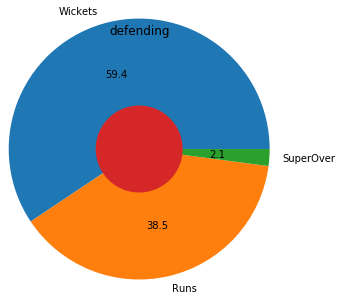

In [63]:
plt.pie(list(df_RR.groupby(['WonBy','ID']).count().index.droplevel(level=1).value_counts()),labels=list(df_RR.groupby(['WonBy','ID']).count().index.droplevel(level=1).value_counts().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('defending')
plt.show()

In [64]:
print('Top 05 chasing Team')
df_TossDecision=df_merge[df_merge['TossDecision']=='field']
df_TossDecision.groupby(['WinningTeam','ID']).count().index.droplevel(level=1).value_counts().head()

Top 05 chasing Team


Mumbai Indians                 79
Royal Challengers Bangalore    74
Kolkata Knight Riders          72
Delhi Daredevils               66
Sunrisers Hyderabad            65
Name: WinningTeam, dtype: int64

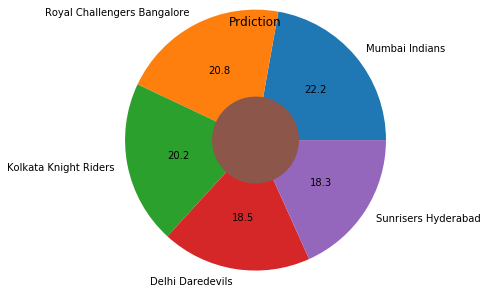

In [65]:
plt.pie(list(df_TossDecision.groupby(['WinningTeam','ID']).count().index.droplevel(level=1).value_counts().head()),labels=list(df_TossDecision.groupby(['WinningTeam','ID']).count().index.droplevel(level=1).value_counts().head().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('Prdiction')
plt.show()

In [66]:
print('Top 05 Defending Team')
df_TossDecision2=df_merge[df_merge['TossDecision']=='bat']
df_TossDecision2.groupby(['WinningTeam','ID']).count().index.droplevel(level=1).value_counts().head()

Top 05 Defending Team


Chennai Super Kings      59
Mumbai Indians           52
Kolkata Knight Riders    42
Rajasthan Royals         40
Sunrisers Hyderabad      39
Name: WinningTeam, dtype: int64

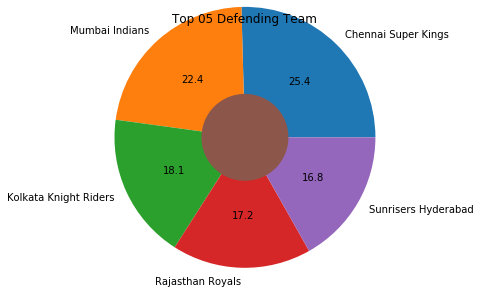

In [67]:
plt.pie(list(df_TossDecision2.groupby(['WinningTeam','ID']).count().index.droplevel(level=1).value_counts().head()),labels=list(df_TossDecision2.groupby(['WinningTeam','ID']).count().index.droplevel(level=1).value_counts().head().keys()),autopct="%0.1f",radius=1.5)
plt.pie([1],radius=0.5)
plt.title('Top 05 Defending Team')
plt.show()

In [68]:
df_merge.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides', '1st_batter', '2nd_batter', 'BowlingTeam'],
      dtype='object')

In [69]:
df_delivery

,ID,innings,overs,ballnumber,batter,bowler,non-striker,batsman_run,extras_run,total_run,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,byes,legbyes,noballs,penalty,wides
225953,335982,2,15,2,SB Joshi,LR Shukla,P Kumar,0,0,0,...,1,SB Joshi,caught,BB McCullum,Royal Challengers Bangalore,0,0,0,0,0
225809,335982,1,12,7,BB McCullum,JH Kallis,DJ Hussey,1,0,1,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,0
225808,335982,1,12,6,BB McCullum,JH Kallis,DJ Hussey,4,0,4,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,0
225807,335982,1,12,5,BB McCullum,JH Kallis,DJ Hussey,0,1,1,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,1
225806,335982,1,12,4,BB McCullum,JH Kallis,DJ Hussey,2,0,2,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1312200,2,4,5,HH Pandya,TA Boult,Shubman Gill,0,0,0,...,0,NaN,NaN,NaN,Gujarat Titans,0,0,0,0,0
148,1312200,2,4,4,HH Pandya,TA Boult,Shubman Gill,0,1,1,...,0,NaN,NaN,NaN,Gujarat Titans,0,0,0,0,1
147,1312200,2,4,3,MS Wade,TA Boult,Shubman Gill,0,0,0,...,1,MS Wade,caught,R Parag,Gujarat Titans,0,0,0,0,0
159,1312200,2,6,1,HH Pandya,OC McCoy,Shubman Gill,0,0,0,...,0,NaN,NaN,NaN,Gujarat Titans,0,0,0,0,0


In [78]:
print('Top twenty Batsman')
df_batter = df_merge.groupby(['batter'])['batsman_run'].sum().sort_values(ascending=False).head(20)
df_batter

Top twenty Batsman


batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
G Gambhir         4217
AT Rayudu         4190
AM Rahane         4074
KL Rahul          3895
SR Watson         3880
MK Pandey         3657
SV Samson         3526
KA Pollard        3437
F du Plessis      3403
YK Pathan         3222
Name: batsman_run, dtype: int64

Top twenty Batsman


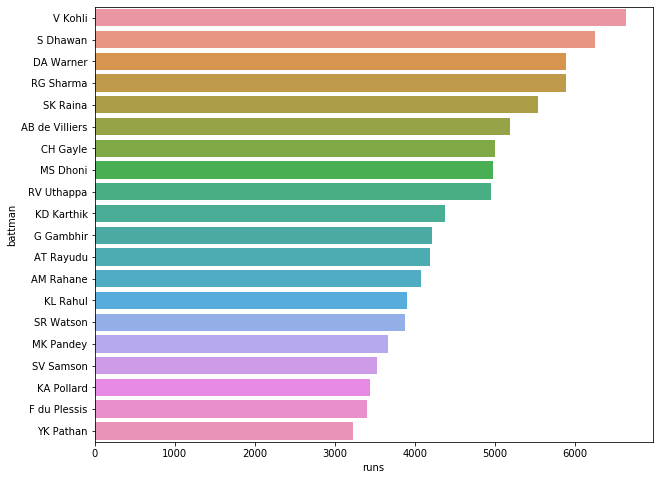

In [79]:
print('Top twenty Batsman')
plt.figure(figsize=(10,8))
sns.barplot(y=df_batter.index,x=df_batter,orient='h')
plt.xlabel('runs')
plt.ylabel('battman')
plt.show()

In [80]:
print('Top twenty Bowler')
df_bowler = df_merge.groupby(['bowler'])['isWicketDelivery'].sum().sort_values(ascending=False).head(20)
df_bowler

Top twenty Bowler


bowler
DJ Bravo           207
SL Malinga         188
A Mishra           175
R Ashwin           174
YS Chahal          172
SP Narine          171
PP Chawla          165
B Kumar            165
Harbhajan Singh    161
JJ Bumrah          161
UT Yadav           153
RA Jadeja          141
R Vinay Kumar      127
Sandeep Sharma     123
A Nehra            121
Z Khan             119
Rashid Khan        119
Mohammed Shami     116
AR Patel           109
K Rabada           108
Name: isWicketDelivery, dtype: int64

Top twenty Bowler


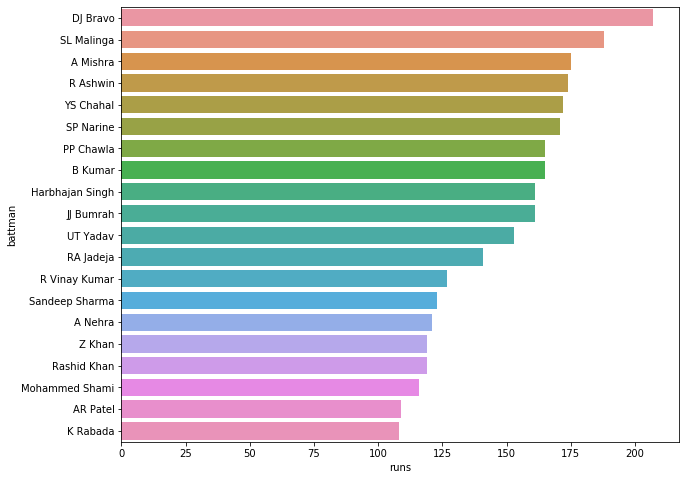

In [81]:
print('Top twenty Bowler')
plt.figure(figsize=(10,8))
sns.barplot(y=df_bowler.index,x=df_bowler,orient='h')
plt.xlabel('runs')
plt.ylabel('battman')
plt.show()

## Top 10 Batsmen score details

In [108]:
top_batsman = df_merge.groupby(['batter']).agg(batsman_total=('batsman_run', 'sum')).reset_index()\
                .sort_values(by='batsman_total', ascending=False).head(10)
top_batsman

,batter,batsman_total
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


In [107]:
top_batsman_score = pd.DataFrame(columns=['batsman', 'fours', 'sixers', 'fifties', 'hundreds','heighest_score','total_runs', 'matches_played'])
for idx, row in top_batsman.iterrows():
    batsman_data = df_merge[df_merge['batter'] == row['batter']][['ID', 'batter', 'batsman_run']]

    r4 = len(batsman_data[batsman_data['batsman_run'] == 4])
    r6 = len(batsman_data[batsman_data['batsman_run'] == 6])

    innings_score = batsman_data.groupby('ID').agg(score=('batsman_run', 'sum')).reset_index()
    r50=len(innings_score[(innings_score['score'] >=50) & (innings_score['score'] < 100)])
    r100 = len(innings_score[innings_score['score'] >= 100])
    matches_played =  len(innings_score)
    heighest_score = innings_score['score'].max()


    top_batsman_score = top_batsman_score.append({'batsman': row['batter'], 'fours': r4, 'sixers': r6, 'fifties':r50,
                                                  'hundreds':r100, 'total_runs':row['batsman_total'],
                                                  'heighest_score':heighest_score,
                                                  'matches_played':matches_played},ignore_index=True)

top_batsman_score

,batsman,fours,sixers,fifties,hundreds,heighest_score,total_runs,matches_played
0,V Kohli,581,219,45,5,113,6634,215
1,S Dhawan,701,137,47,2,106,6244,205
2,DA Warner,577,216,55,4,126,5883,162
3,RG Sharma,519,241,40,1,109,5881,221
4,SK Raina,506,204,39,1,100,5536,200
5,AB de Villiers,414,253,41,3,133,5181,170
6,CH Gayle,408,359,32,6,175,4997,141
7,MS Dhoni,346,229,24,0,84,4978,205
8,RV Uthappa,481,182,27,0,88,4954,197
9,KD Karthik,426,134,20,0,97,4377,207


## Top 10 Bollower details

In [111]:
top_bowler = df_merge.groupby(['bowler']).agg(Total_Wicket=('isWicketDelivery', 'sum')).reset_index()\
                .sort_values(by='Total_Wicket', ascending=False).head(10)
top_bowler

,bowler,Total_Wicket
109,DJ Bravo,207
393,SL Malinga,188
7,A Mishra,175
317,R Ashwin,174
468,YS Chahal,172
401,SP Narine,171
63,B Kumar,165
310,PP Chawla,165
149,Harbhajan Singh,161
177,JJ Bumrah,161


In [123]:
top_bowler_score = pd.DataFrame(columns=['bowler','total_wicket','matches_played'])
for idx, row in top_bowler.iterrows():
    bowler_data = df_merge[df_merge['bowler'] == row['bowler']][['ID', 'bowler', 'isWicketDelivery']]

    total_wicket = bowler_data.groupby('ID').agg(score=('isWicketDelivery', 'sum')).reset_index()
    matches_played =  len(total_wicket)
    heighest_wicket = total_wicket ['score'].max()

    top_bowler_score = top_bowler_score.append({'bowler': row['bowler'],'total_wicket':row['Total_Wicket'],
                                                  'heighest_wicket':heighest_wicket,
                                                  'matches_played':matches_played},ignore_index=True)

top_bowler_score

,bowler,total_wicket,matches_played,heighest_wicket
0,DJ Bravo,207,158,4.0
1,SL Malinga,188,122,5.0
2,A Mishra,175,154,5.0
3,R Ashwin,174,181,5.0
4,YS Chahal,172,130,5.0
5,SP Narine,171,147,5.0
6,B Kumar,165,146,5.0
7,PP Chawla,165,164,4.0
8,Harbhajan Singh,161,160,5.0
9,JJ Bumrah,161,120,5.0
